## Exploration of structure in classification

There are multiple approaches to incorporating structure into classification/regression frameworks. 
* Multitask learning: Assumes we have a finite set of 'related' task to be learned jointly. This is expected to help when the tasks are sufficiently similar and there is insufficient data to learn independent models for each task well. 
    * Generally assumes a shared feature space
* Transfer learning. Idea that we wish to leverage learning done on one task for another task. Differs from multitask learning in that it generally considers a source task - that has already been trained and a new target task (rather than two tasks to be learned jointly)
* Semi superivsed learning - supervised learning with additional unlabeld data
* Danial's work. Two-step semi-supervised learning. 
* Strutured Output (eg vector,graph,tree,etc output). Can be viewed as an instance of multiclass classification where each possible output is a seperate class.


### Pairs Data
A very simple synthetic problem to help get an understanding of how these approaches work/relate

The idea is that we have two types of things, A and B. For each type the features are sampled from a multi-dimensional gaussian. 

Each row of training data contains features for object 1, features for object 2, label of object 1, label of object 2. This is a multi-class classification problem with 4 classes AA, AB, BA, BB. 

The additional structure we consider over the labels is the likelyhood that the pairs match (ie AA or BB)

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
sns.set(style="darkgrid")
%matplotlib inline

In [129]:
# Generates synthetic data, note we represent things of type A with 1 and B with 0.
n = 100 # number of rows
m1,c1 = [1,-1],[[.9,0],[0,.9]] # mean and covariance for type A
m2,c2 = [-1,1],[[.7,0],[0,.4]] # mean and covariance for type B
object_rvs = np.array([multivariate_normal(mean = m1, cov = c1), multivariate_normal(mean = m2, cov = c2)])
p1 = 0.5 # probability object 1 is of type A
p2given1 = np.array([.2,.8]) # probability object 2 is of type A given object1=A,object1=B

# Sample the types (labels)
y1 = bernoulli.rvs(p1,size=n)
y2 = bernoulli.rvs(p2given1[y1],size=n)

# Sample the features given the types

x = np.empty((n,len(m1)+len(m2)))
for row in range(n):
    x1 = object_rvs[y1[row]].rvs()
    x2 = object_rvs[y2[row]].rvs()
    x[row] = np.hstack([x1,x2])

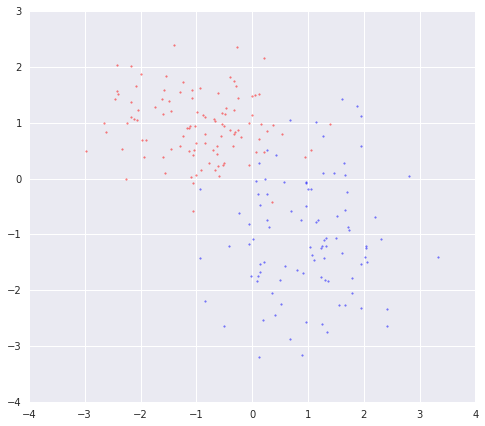

In [130]:
# Plot the distributions for each type

# get features for things of each type
t1 = np.vstack([x[np.where(y1 == 1)[0],0:2],x[np.where(y2 == 1)[0],2:]])
t2 = np.vstack([x[np.where(y1 == 0)[0],0:2],x[np.where(y2 == 0)[0],2:]])

f,ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")
#sns.kdeplot(t1[:,0],t1[:,1],cmap="Reds",shade=True,shade_lowest=False,ax=ax,alpha=0.5)
ax.scatter(t1[:,0],t1[:,1],color = "red",s=3,alpha=.5)
#sns.kdeplot(t2[:,0],t2[:,1],cmap="Blues",shade=True,shade_lowest=False,ax=ax,alpha=0.5)
ax.scatter(t2[:,0],t2[:,1],color = "blue",s=3,alpha=0.5)
plt.show()

In [136]:
np.vstack([y1,y2]).T

array([[1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1,